In [1]:
import pandas as pd
data=pd.read_csv("/kaggle/input/crop-production-statistics-india/APY.csv")

In [3]:
data.head(10)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
5,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Summer,4153.0,2080.0,0.50
6,Andaman and Nicobar Island,NICOBARS,Arecanut,2000,Kharif,1254.0,2000.0,1.59
7,Andaman and Nicobar Island,NICOBARS,Arecanut,2001,Kharif,1254.0,2061.0,1.64
8,Andaman and Nicobar Island,NICOBARS,Arecanut,2002,Whole Year,1258.0,2083.0,1.66
9,Andaman and Nicobar Island,NICOBARS,Arecanut,2003,Whole Year,1261.0,1525.0,1.21


In [4]:
print(data.isnull().sum)

<bound method DataFrame.sum of         State  District    Crop  Crop_Year  Season  Area   Production  Yield
0       False      False  False      False   False  False       False  False
1       False      False  False      False   False  False       False  False
2       False      False  False      False   False  False       False  False
3       False      False  False      False   False  False       False  False
4       False      False  False      False   False  False       False  False
...       ...        ...    ...        ...     ...    ...         ...    ...
345331  False      False  False      False   False  False       False  False
345332  False      False  False      False   False  False       False  False
345333  False      False  False      False   False  False       False  False
345334  False      False  False      False   False  False       False  False
345335  False      False  False      False   False  False       False  False

[345336 rows x 8 columns]>


In [5]:
rop_names = data['State'].unique()

# Create a label-to-name mapping
rop_labels = {i: crop for i, crop in enumerate(sorted(rop_names))}
print(rop_labels)


{0: 'Andaman and Nicobar Island', 1: 'Andhra Pradesh', 2: 'Arunachal Pradesh', 3: 'Assam', 4: 'Bihar', 5: 'CHANDIGARH', 6: 'Chhattisgarh', 7: 'Dadra and Nagar Haveli', 8: 'Daman and Diu', 9: 'Delhi', 10: 'Goa', 11: 'Gujarat', 12: 'Haryana', 13: 'Himachal Pradesh', 14: 'Jammu and Kashmir', 15: 'Jharkhand', 16: 'Karnataka', 17: 'Kerala', 18: 'Laddak', 19: 'Madhya Pradesh', 20: 'Maharashtra', 21: 'Manipur', 22: 'Meghalaya', 23: 'Mizoram', 24: 'Nagaland', 25: 'Odisha', 26: 'Puducherry', 27: 'Punjab', 28: 'Rajasthan', 29: 'Sikkim', 30: 'THE DADRA AND NAGAR HAVELI', 31: 'Tamil Nadu', 32: 'Telangana', 33: 'Tripura', 34: 'Uttar Pradesh', 35: 'Uttarakhand', 36: 'West Bengal'}


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [7]:
target_crops = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 
                'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans',
                'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate',
                'rice', 'watermelon']

data = data[data['Crop'].str.lower().isin(target_crops)]



In [8]:
data['Date'] = pd.to_datetime(data['Crop_Year'], format='%Y')
data.set_index('Date', inplace=True)


In [9]:
data = data.dropna(subset=['Crop'])


In [10]:
# Step 1: Strip any extra spaces in column names
data.columns = data.columns.str.strip()

# Step 2: Drop rows where 'Crop' is missing (only 9 rows)
data = data.dropna(subset=['Crop'])

# Step 3: Fill missing 'Production' values using: Production = Area * Yield
missing_prod = data['Production'].isnull()

# Check if 'Area' and 'Yield' are available before multiplying
fill_condition = missing_prod & data['Area'].notnull() & data['Yield'].notnull()

# Apply the formula
data.loc[fill_condition, 'Production'] = data.loc[fill_condition, 'Area'] * data.loc[fill_condition, 'Yield']

# Optional: Drop remaining rows where 'Production' is still missing
data = data.dropna(subset=['Production'])

# ✅ Check if all missing values are fixed
print(data.isnull().sum())


State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


In [11]:
data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
Date,,,,,,,,
2007-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2007,Kharif,837.95,7451.0,8.89
2007-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2007,Rabi,685.59,6096.0,8.89
2008-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2008,Autumn,795.00,7710.0,9.70
2008-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2008,Summer,794.00,7710.0,9.71
2009-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2009,Autumn,798.00,7435.0,9.32


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Confirm datetime index
data.index = pd.to_datetime(data.index)

# Overview
print(data.shape)
print(data.dtypes)
print(data.describe())
print(data['Crop'].value_counts().head(10))


(48177, 8)
State          object
District       object
Crop           object
Crop_Year       int64
Season         object
Area          float64
Production    float64
Yield         float64
dtype: object
          Crop_Year           Area    Production        Yield
count  48177.000000   48177.000000  4.817700e+04  48177.00000
mean    2008.867945   24943.004798  6.512684e+04      4.93975
std        6.606584   50203.959490  1.489504e+05     16.56411
min     1997.000000       0.040000  0.000000e+00      0.00000
25%     2003.000000     418.000000  9.350000e+02      1.41000
50%     2009.000000    3545.000000  9.169000e+03      2.14000
75%     2015.000000   22744.000000  5.534700e+04      3.21000
max     2020.000000  687000.000000  2.589591e+06   1494.00000
Crop
Rice      21611
Maize     20513
Banana     4140
Jute       1913
Name: count, dtype: int64


<ipython-input-13-2b912f4eeb4e>:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


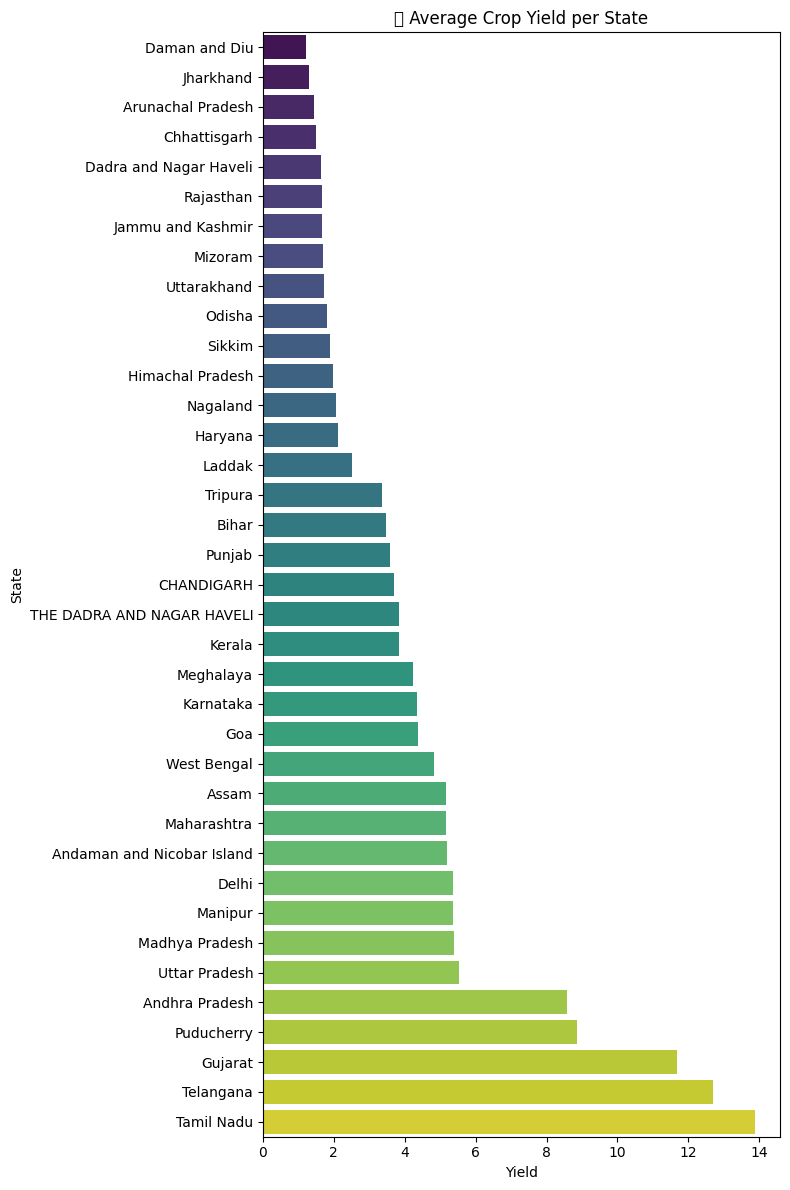

In [13]:
state_yield = data.groupby('State')['Yield'].mean().sort_values()

plt.figure(figsize=(8,12))
sns.barplot(y=state_yield.index, x=state_yield.values, palette='viridis')
plt.title("🌍 Average Crop Yield per State")
plt.xlabel("Yield")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [14]:
# Show unique seasons
print(data['Season'].unique())



['Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     ' 'Whole Year '
 'Winter     ']


In [15]:
print(data.columns.tolist())


['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area', 'Production', 'Yield']


In [17]:
# Remove extra spaces
data['Season'] = data['Season'].str.strip()

# Now map seasons to months
season_month_mapping = {
    'Kharif': 9,
    'Rabi': 3,
    'Summer': 6,
    'Winter': 12,
    'Autumn': 10,
    'Whole Year': 7
}

# Map season to month
data['Month'] = data['Season'].map(season_month_mapping)

# Now safely create the Date column
data['Date'] = pd.to_datetime(data['Crop_Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')


In [18]:
import pandas as pd

# Define a mapping of seasons to approximate months
season_month_mapping = {
    'Kharif': 9,     # September
    'Rabi': 3,       # March
    'Summer': 6,     # June
    'Winter': 12,    # December
    'Autumn': 10,    # October
    'Whole Year': 7  # Mid-Year Approximation
}

# Clean the Season column to remove leading/trailing whitespace
data['Season'] = data['Season'].str.strip()

# Create a Date column using the Crop_Year and Season-based month approximation
data['Month'] = data['Season'].map(season_month_mapping)
data['Date'] = pd.to_datetime(data['Crop_Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')

# Extract more time-based features
data['Decade'] = (data['Crop_Year'] // 10) * 10  # Group into decades
data['Quarter'] = data['Date'].dt.quarter

# Display the first few rows
data.head()


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Month,Date,Decade,Quarter
Date,,,,,,,,,,,,
2007-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2007,Kharif,837.95,7451.0,8.89,9,2007-09-01,2000,3
2007-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2007,Rabi,685.59,6096.0,8.89,3,2007-03-01,2000,1
2008-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2008,Autumn,795.00,7710.0,9.70,10,2008-10-01,2000,4
2008-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2008,Summer,794.00,7710.0,9.71,6,2008-06-01,2000,2
2009-01-01,Andaman and Nicobar Island,NICOBARS,Banana,2009,Autumn,798.00,7435.0,9.32,10,2009-10-01,2000,4


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in ['State', 'District', 'Crop', 'Season']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for inverse transformation later

data.head()


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Month,Date,Decade,Quarter
Date,,,,,,,,,,,,
2007-01-01,0,457,0,2007,1,837.95,7451.0,8.89,9,2007-09-01,2000,3
2007-01-01,0,457,0,2007,2,685.59,6096.0,8.89,3,2007-03-01,2000,1
2008-01-01,0,457,0,2008,0,795.00,7710.0,9.70,10,2008-10-01,2000,4
2008-01-01,0,457,0,2008,3,794.00,7710.0,9.71,6,2008-06-01,2000,2
2009-01-01,0,457,0,2009,0,798.00,7435.0,9.32,10,2009-10-01,2000,4


In [20]:
print(data.columns.tolist())


['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area', 'Production', 'Yield', 'Month', 'Date', 'Decade', 'Quarter']


In [21]:
# Reset the index but drop it to avoid duplication
data = data.reset_index(drop=True)

# Now safely sort and create lag features
data = data.sort_values(by=['Crop', 'State', 'District', 'Date'])

# Create lag features
data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production'].shift(1)
data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production'].shift(3)

data.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Month,Date,Decade,Quarter,Production_Lag_1,Production_Lag_3
6,0,457,0,2000,4,176.000,641.0,3.64,7,2000-07-01,2000,3,NaN,NaN
7,0,457,0,2002,4,213.000,1278.0,6.00,7,2002-07-01,2000,3,641.0,NaN
8,0,457,0,2003,4,266.000,1763.0,6.63,7,2003-07-01,2000,3,1278.0,NaN
9,0,457,0,2004,4,66.418,404.0,6.08,7,2004-07-01,2000,3,1763.0,641.0
10,0,457,0,2005,4,22.000,582.0,26.45,7,2005-07-01,2000,3,404.0,1278.0


In [22]:
data.sort_values(['State', 'District', 'Crop', 'Date'], inplace=True)

data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production'].shift(1)
data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production'].shift(3)


In [23]:
data['Production'] = data.groupby(['Crop', 'Season'])['Production'].transform(lambda x: x.fillna(x.median()))



In [24]:
data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_1'].transform(lambda x: x.fillna(x.median()))
data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_3'].transform(lambda x: x.fillna(x.median()))


In [25]:
data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_1'].transform(lambda x: x.fillna(x.median()))
data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_3'].transform(lambda x: x.fillna(x.median()))
 

In [26]:
# Step 1: Sort the DataFrame
data = data.sort_values(by=['State', 'District', 'Crop', 'Date'])

# Step 2: Fill missing values forward then backward within each group
data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_1']\
                               .transform(lambda x: x.ffill().bfill())

data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_3']\
                               .transform(lambda x: x.ffill().bfill())

# Step 3: Fill remaining missing values with the median of each group
data['Production_Lag_1'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_1']\
                               .transform(lambda x: x.fillna(x.median()))

data['Production_Lag_3'] = data.groupby(['State', 'District', 'Crop'])['Production_Lag_3']\
                               .transform(lambda x: x.fillna(x.median()))

# Step 4: Fill any final leftovers with 0
data[['Production_Lag_1', 'Production_Lag_3']] = data[['Production_Lag_1', 'Production_Lag_3']].fillna(0)


In [27]:
import pandas as pd
import numpy as np
import joblib  # For saving/loading models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' is already loaded
df_model = data.dropna()

# Define features and target
features = ['State', 'District', 'Crop_Year', 'Season', 'Crop', 
            'Area', 'Month', 'Decade', 'Quarter', 'Production_Lag_1', 'Production_Lag_3']
target = 'Production'

# Separate features and target
X = df_model[features]
y = df_model[target]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['State', 'District', 'Season', 'Crop', 'Month', 'Decade', 'Quarter'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, shuffle=False, test_size=0.2)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Correctly save the trained model
joblib.dump(model, "prediction_model.pkl")
print("Model saved successfully as 'random_forest_crop_model.pkl'")  # Should print correctly

 
 
 


Model saved successfully as 'random_forest_crop_model.pkl'


In [28]:
# ✅ Correctly save the trained model
joblib.dump(model, "random.pkl")
print("Model saved successfully as 'random_forest_crop_model.pkl'")

Model saved successfully as 'random_forest_crop_model.pkl'


In [34]:
pd.DataFrame(columns=X_encoded.columns).to_csv("encoded_feature_columns.csv", index=False)


In [30]:
import pandas as pd

# Assuming you already have your cleaned/preprocessed data as 'data' or 'df_model'
# Make sure it includes these columns: State, District, Crop, Season, Crop_Year, Production

# Step 1: Drop rows with missing values in relevant columns (if any)
historical_df = data[['State', 'District', 'Crop', 'Season', 'Crop_Year', 'Production']].dropna()

# Step 2: Optional - sort the data for consistency (not required but recommended)
historical_df = historical_df.sort_values(by=['State', 'District', 'Crop', 'Season', 'Crop_Year'])

# Step 3: Save as CSV
historical_df.to_csv("historical_production.csv", index=False)

print("✅ historical_production.csv has been generated successfully!")


✅ historical_production.csv has been generated successfully!


In [35]:

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 25657.380330012456
R² Score: 0.830489376847316


In [ ]:
import joblib

# Save the best model
joblib.dump(model, 'best_random_forest.pkl')


In [ ]:
history=pd.read_csv("/kaggle/working/historical_production.csv")
history.head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Production')
plt.xlabel('Samples')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle
import joblib
model = pickle.load(open("/kaggle/working/prediction_model.pkl", "rb"))
print("Loaded model type:", type(model))


In [ ]:
# Save the model correctly
with open("/kaggle/working/prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [31]:
print(type(model))  # Should output: <class 'sklearn.ensemble.RandomForestRegressor'>


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [ ]:
import pandas as pd
check=pd.read_csv("/kaggle/input/crop-recommended/crop_recommendation.csv")

In [ ]:
check.head()

In [ ]:
 import pandas as pd